<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

# dynamic Bayesian Networks with pyAgrum

In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn
%matplotlib inline

### Building a 2TBN

Note the naming convention for a 2TBN : a variable with a name $A$ is present at t=0 with the name $A0$ and at time t as $At$.

In [2]:
twodbn=gum.BayesNet()
a0,b0,c0,at,bt,ct=[twodbn.add(gum.LabelizedVariable(s,s,6)) 
                   for s in ["a0","b0","c0","at","bt","ct"]]
d0,dt=[twodbn.add(gum.LabelizedVariable(s,s,3)) 
       for s in ["d0","dt"]]

twodbn.addArc(a0,b0)

twodbn.addArc(c0,d0)

twodbn.addArc(a0,at)
twodbn.addArc(a0,bt)
twodbn.addArc(a0,dt)
twodbn.addArc(b0,bt)
twodbn.addArc(c0,ct)
twodbn.addArc(d0,ct)
twodbn.addArc(d0,dt)

twodbn.addArc(at,ct)
twodbn.generateCPTs()

gnb.showBN(twodbn)

## 2TBN

The dbn above actually is a 2TBN and is not correctly shown as a BN. Using the naming convention, it can be shown as a 2TBN.

In [3]:
gdyn.showTimeSlices(twodbn,format="svg")

## unrolling 2TBN

A dBN is 'unrolled' using the 2TBN and the time period size. For a couple $a_0$,$a_t$ in the 2TBN, the unrolled dBN will include $a_0, a_1, \cdots, a_{T-1}$

In [4]:
T=5

dbn=gdyn.unroll2TBN(twodbn,T)
gdyn.showTimeSlices(dbn,size="10")

We can infer on bn just as on a normal bn. Following the naming convention in 2TBN, the variables in a dbN are named using the convention $a_i$ where $i$ is the number of their time slice.

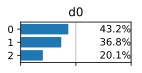

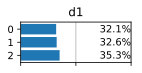

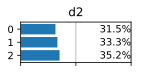

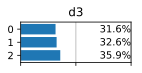

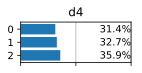

In [5]:
%config InlineBackend.figure_format = 'svg'
for i in range(T):
    gnb.showPosterior(dbn,target="d{}".format(i),evs={})

## dynamic inference : following variables

`gdyn.plotFollow` directly ask for the 2TBN, unroll it and add evidence `evs`. Then it shows the dynamic of variable $a$ for instance by plotting $a_0,a_1,\cdots,a_{T-1}$.

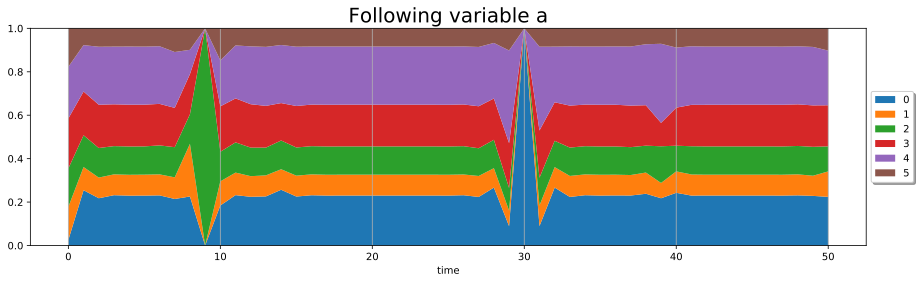

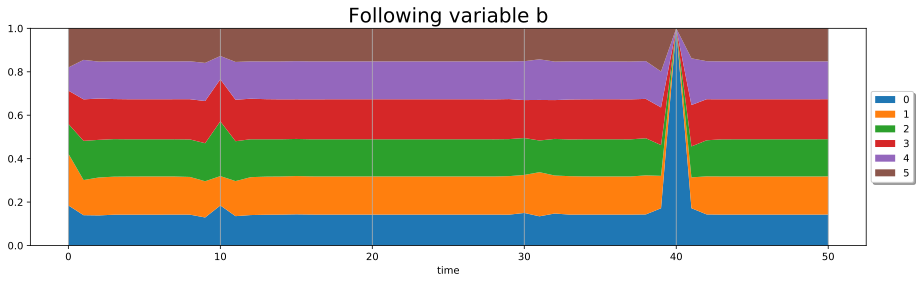

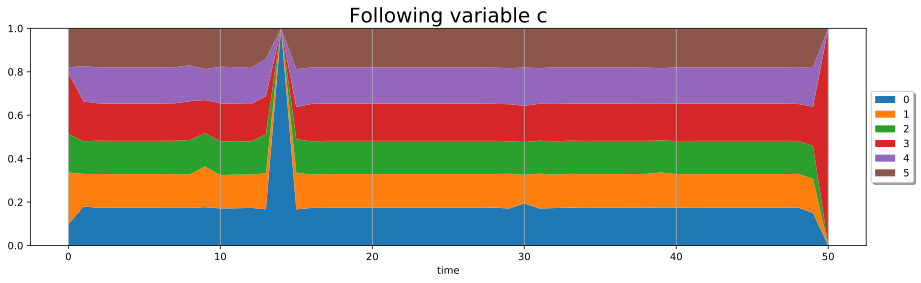

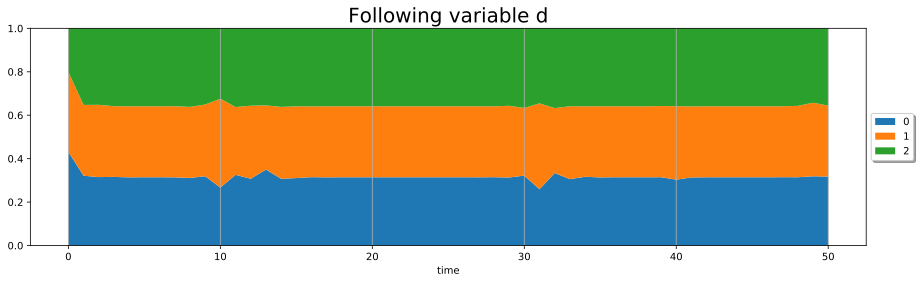

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (15, 4)
gdyn.plotFollow(["a","b","c","d"],twodbn,T=51,evs={'a9':2,'a30':0,'c14':0,'b40':0,'c50':3})  